https://www.youtube.com/watch?v=tfM_DdbGTLs&list=PLtBw6njQRU-rwp5__7C0oIVt26ZgjG9NI&index=6

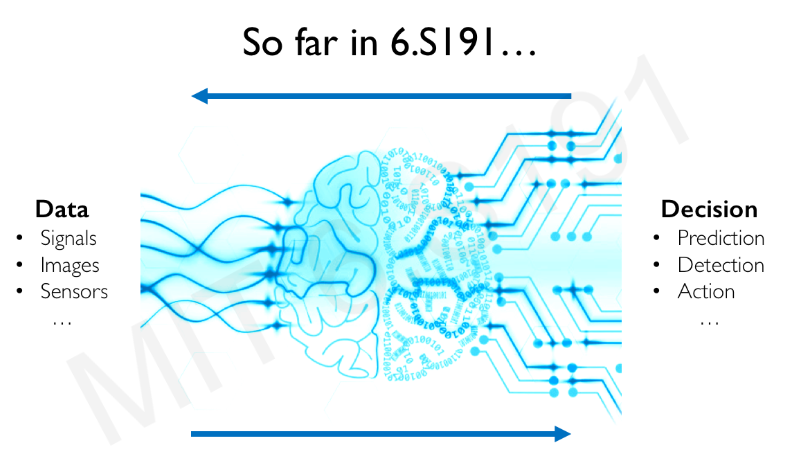

###There is a theorem that basically says that every function can be approximated with a NNet

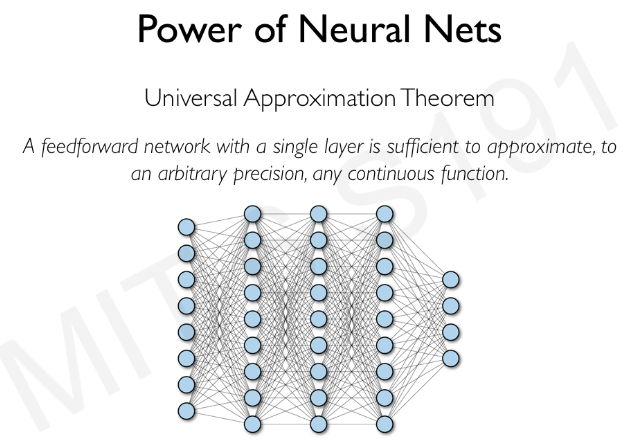

####But there are problems with neural nets

* There are only so many units we can use before the model becomes infeasible.

* The result might not be able to generalize

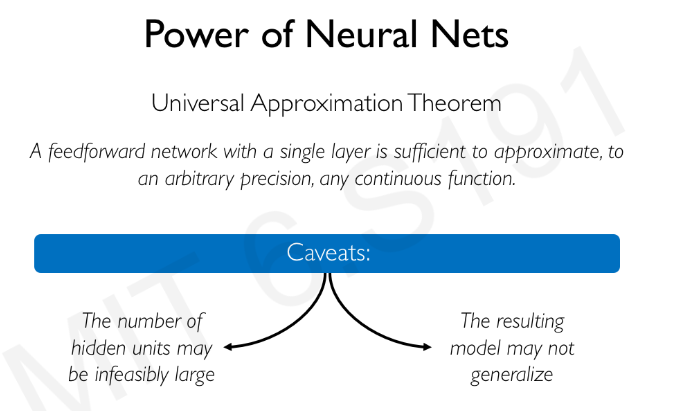

####The AI Hype curve

https://en.wikipedia.org/wiki/Hype_cycle   <- it might have another shape

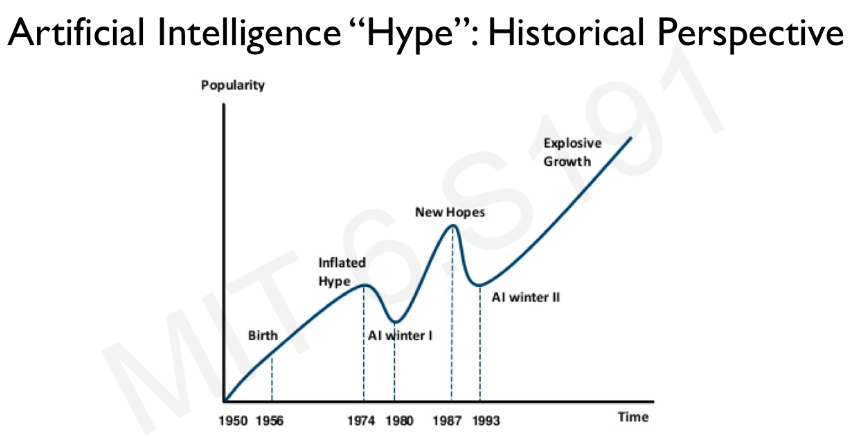

####Google did an experiment to prove that NNets can fit perfectly to random data, which makes no sense when we get to test data.

They basically made a classification network, (dog, tree, banana) but randomized their labels. The model actually managed to get 100% accuracy for the training set, but it obiously did really bad in the testing set.

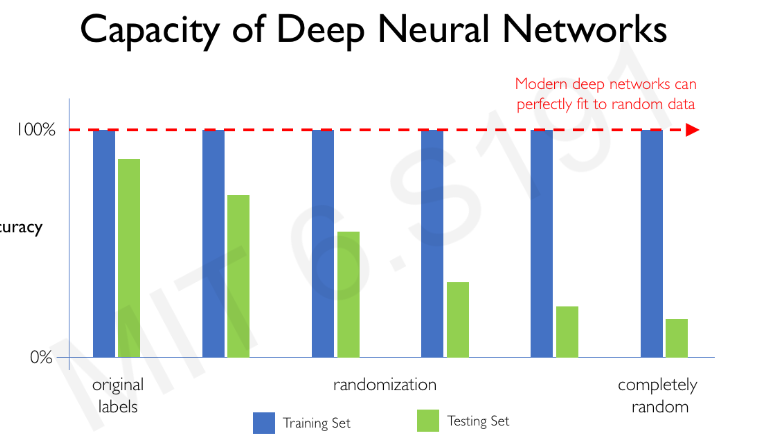

####Neural networks are great as function approximators, but only when we have proper training data.

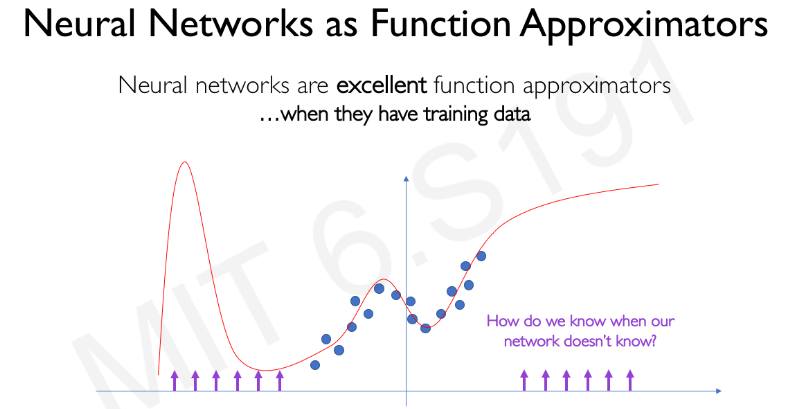

####One way where NNets tend to be weak is exemplified when we do adversarial attacks.

Where a simple-and minor change of pixel values can lead to a completely different result 

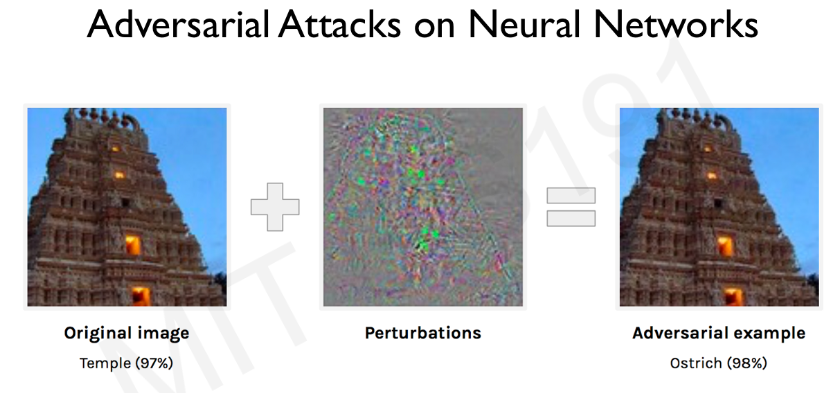

This happens because we train our networks with gradient descent, and a small change in the inputs can increase our loss. That is the point of adversarial attacks, changing the input as little as possible to fool the network

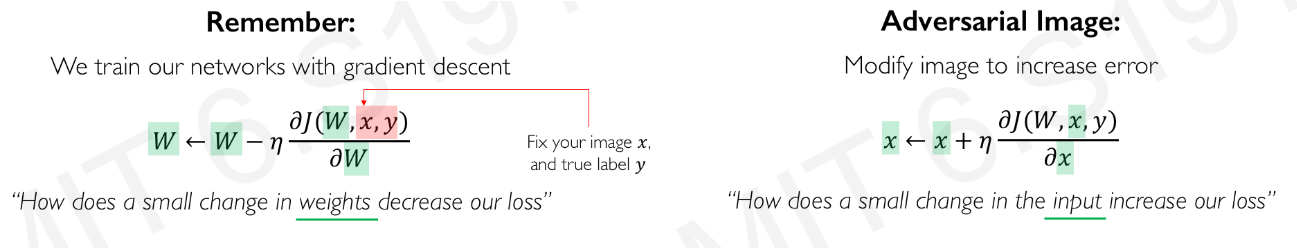

Fun note: Some guys at MIT trained an adversarial network to fool a classifier of turtles. and then 3d printed turtles with this perturbations on them, and they  fooled the network!

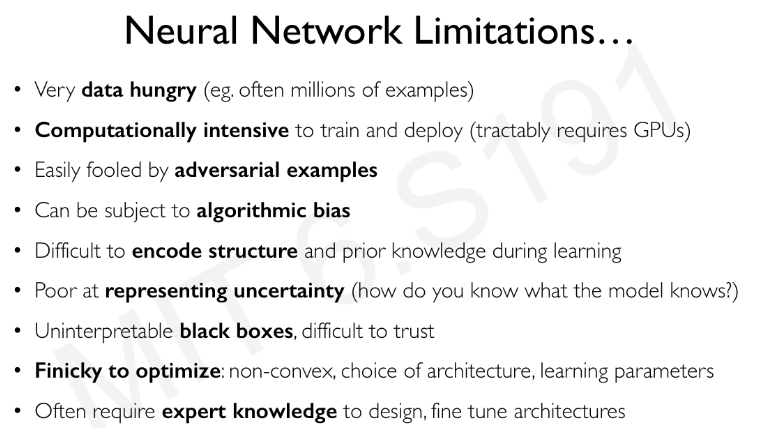

#New frontiers 1

###Encoding structure into Deep Learning.

How can we encode structure and domain knowledge into designing DNN.

One example are CNN's, where images are passed into a NeuralNet

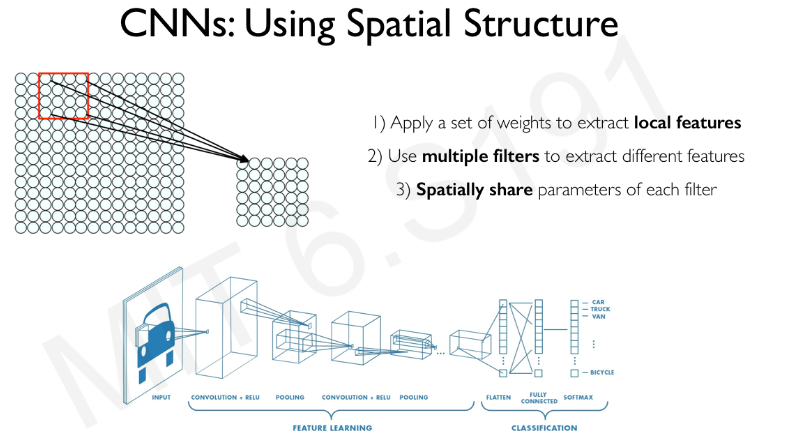

An structure we could use to represent data is graphs, basically: How can we teach a NNet to learn data in graph structure

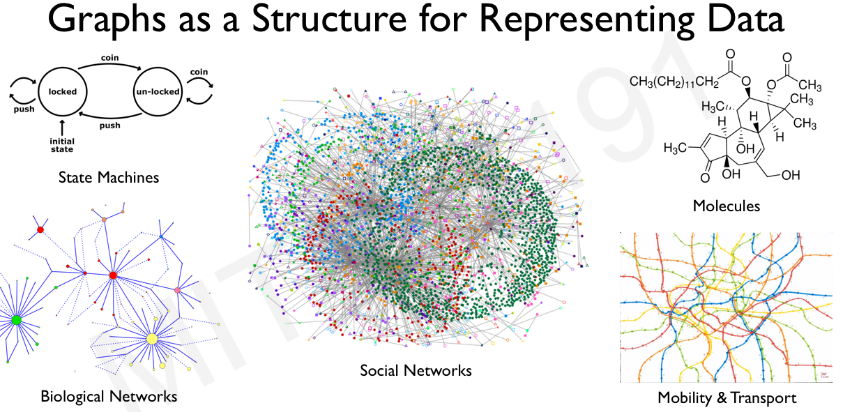

Graph Convolutional Networks instead of sliding across an image (like a CNN), uses a kernel of weights that are applied to each node of the graph. The network is looking at a node and its neighborhoods (and passes the whole graph in this manner) and aggregates information about nodes and their neighborhoods and ecodes that into a high level representation. 



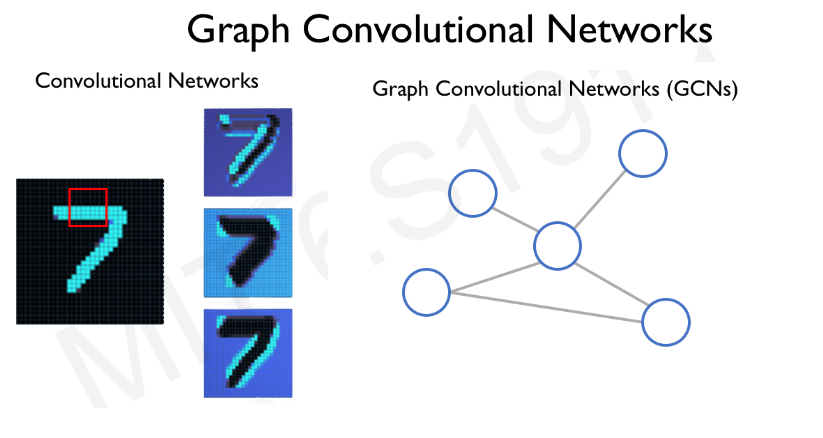

Another type of data is 3D data



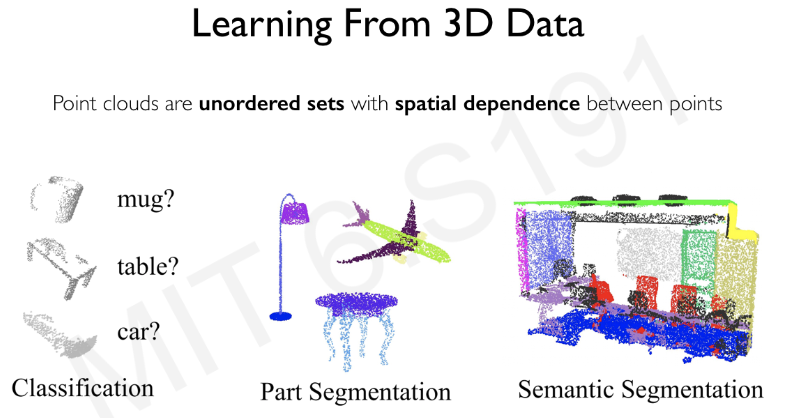

#New frontiers 2

###Uncertainty estimation and Bayesian Deep Learning

How do we know how confident a model is in its predictions.

###Uncertainty

If we feed a network an image that is not deviced to label, it still outputs a probability of its labels, which might not be correct.

eg. we feed a dog and it tells us that the probability of dog is 80%. but since probabilities allways sum to 1, it will give distorted results (NOTE: probability != confidence).



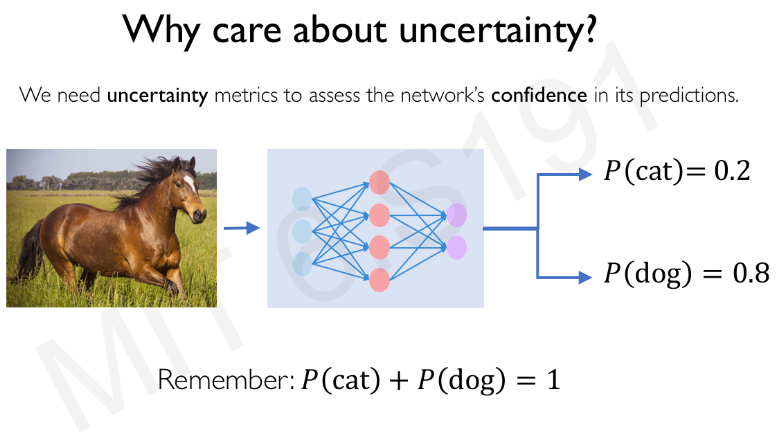

##Bayesian Deep Learning

This is to solve the problem of uncertainty.

In this nets, rather than directly learning the weights, this network applies a posterior probability distribution. NOTE: This posterior function is intractable computationally. - one approach to solve this is to try to approximate this distribution using sampling operations.



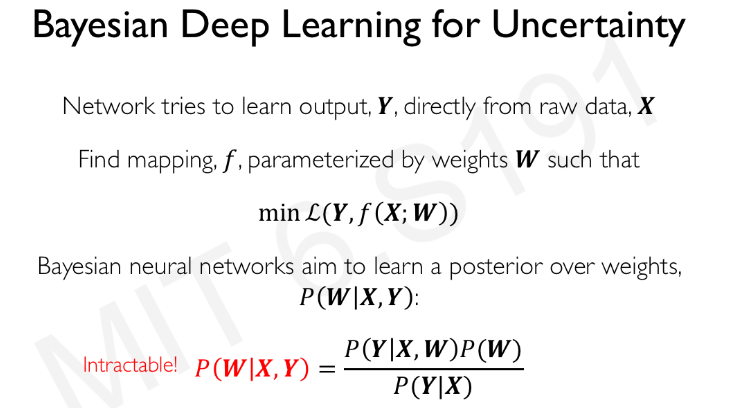

One example of how sampling is used to approximate this posterior function is by using dropout.

By doing this we could obtain a metric or estimate of the model uncertainty.

An example: consider a CNN where you have sets of weights, you perform different passes through the network and each pass you stochastically sample the sets of weights used, then you apply this dropout filter/mask, where in each filter some of the weights will be droped to zero.

Then by multiplying element-wise between the kernel and the mask, you generate filters where some of the weights have been stochastically dropped out, and if we do this many times, we obtain different predictions from the model, then by looking at the expected value of the predictions and their variance we can get a sense of how uncertain the model is.

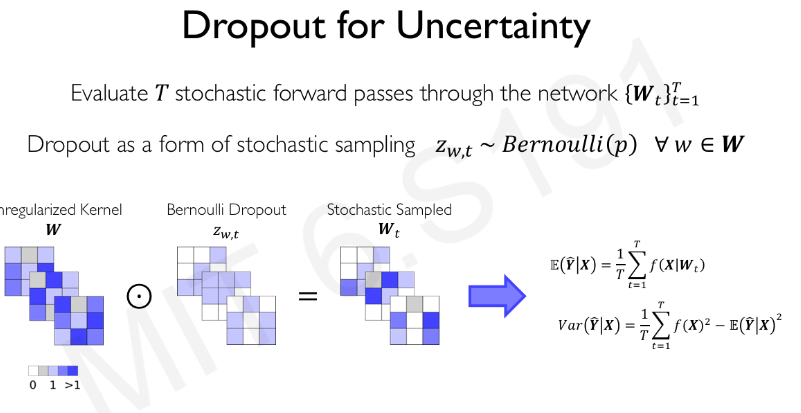

You can also use Ensembling to estimate uncertainty.

For example in this method you can "Ensemble" different instances of models to obtain estimates of uncertainty.

EG. self-driving-cars: To estimate the uncertainty:
1. you take an esamble of instances of the model, 
2. drop out some samples (each model has different sets of weights that go to zero), 
3. from each model you get a different estimate from the predicted steering wheel angle, 
4. then you aggregate this instances and you get a distribution.
5. to estimate the uncertainty then you consider the variance/spread of this estimates (the more spread-out the more uncertain and vice-versa)


 

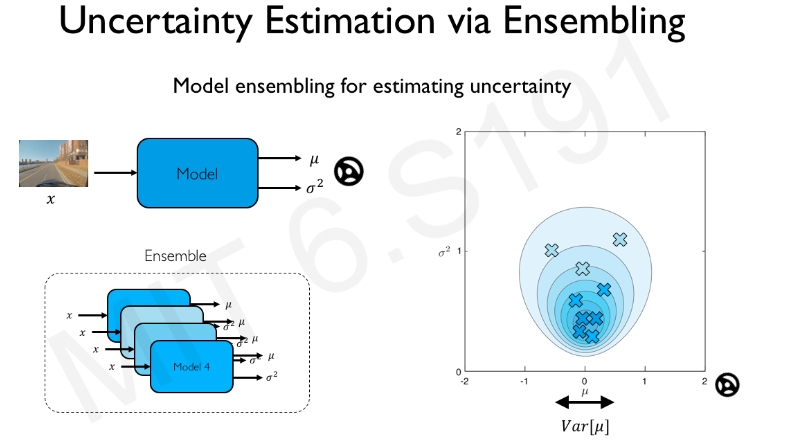

Basically what you want to do is sample from this underlying distribution, but you can directly learn this distribution, with Evidential Deep Learning.

An evidential distribution captures how much evidence the model has in support of a distribution.

To train this networks you first try to maximize the fit of the inferred distribution to the data, and also minimize evidence on errors. 
If we train a network using this approach, we can generate calibrated accurate estimates of uncertainty for every prediction the network makes. 

EG. we train a regression model, where there is no data (the grey regions) the model gives lots of uncertainty.
EG2. A model where adversarial perturbation is used in the input, gives higher uncertainty.





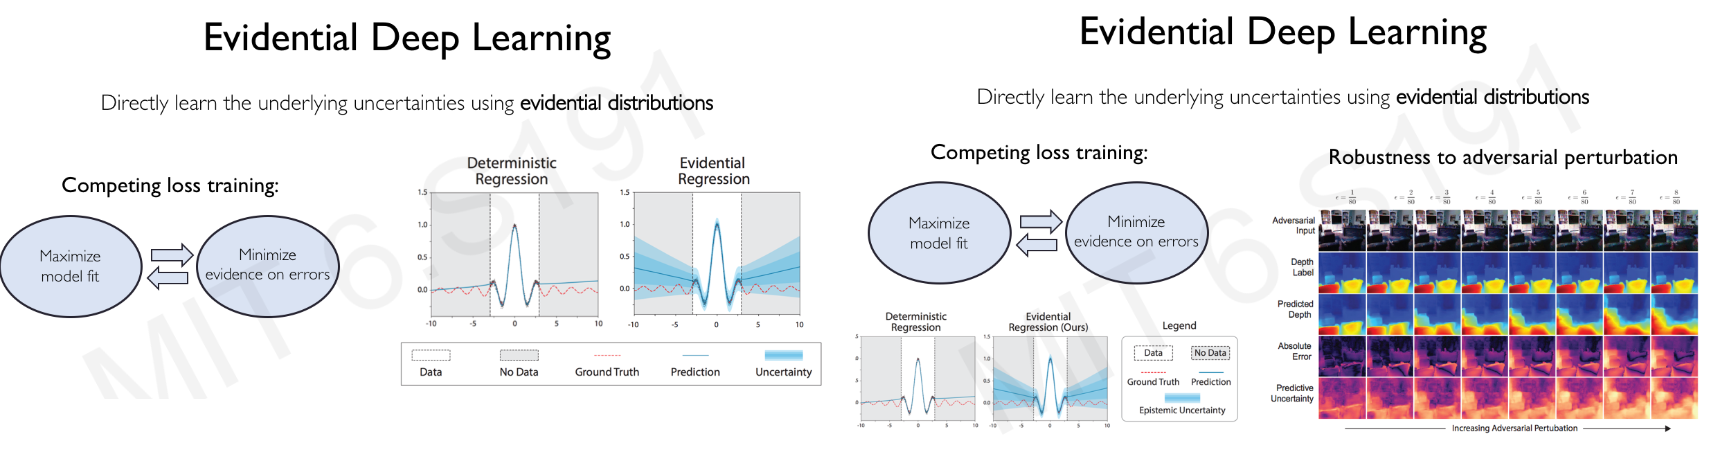

Uncertainty estimation can also be integrated into different types of tasks



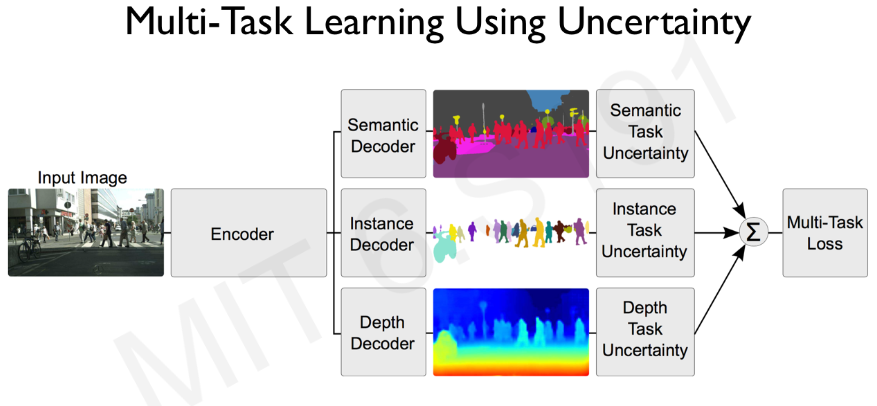

#New frontiers 3

Automated Machine Learning

Basically is automating the task of tuning the model

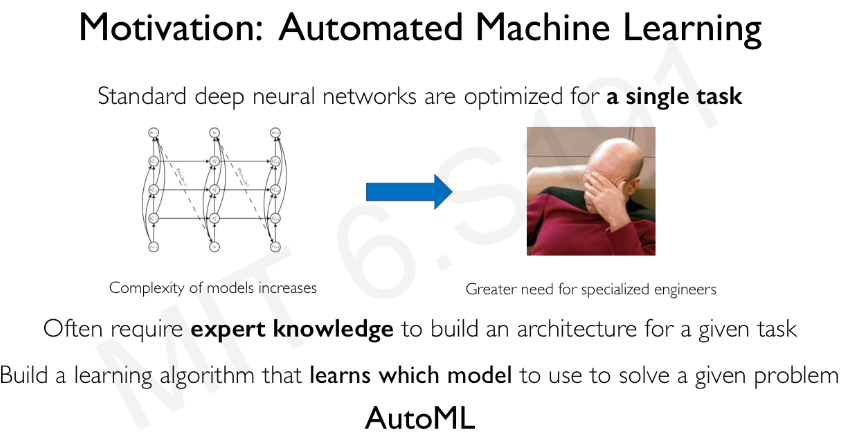

AutoML uses a Reinforcement learning framework:

In this framework there is:
* a controller (agent), which proposes a "child model architecture" in terms of the hyperparameters terms of the hyperparameters that model would teoretically have, then that network is trained and evaluated and its performance is used as feedback/reward for the Agent, and this agent takes this feedback and improves the child network.

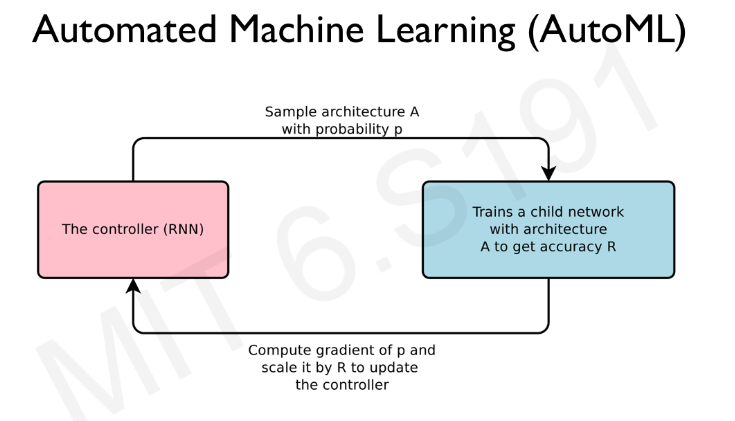

* The controller: It is an RNN controller that at the macro-scale considers what are the different values of the hyperparameters for a particular layer in the generated network. (eg- in a CNN- number and size of convolutional filters).

* The child network: after the controller proposes this network, it is trained and its accuracy is evaluated and this is then used as feedback to the controller.


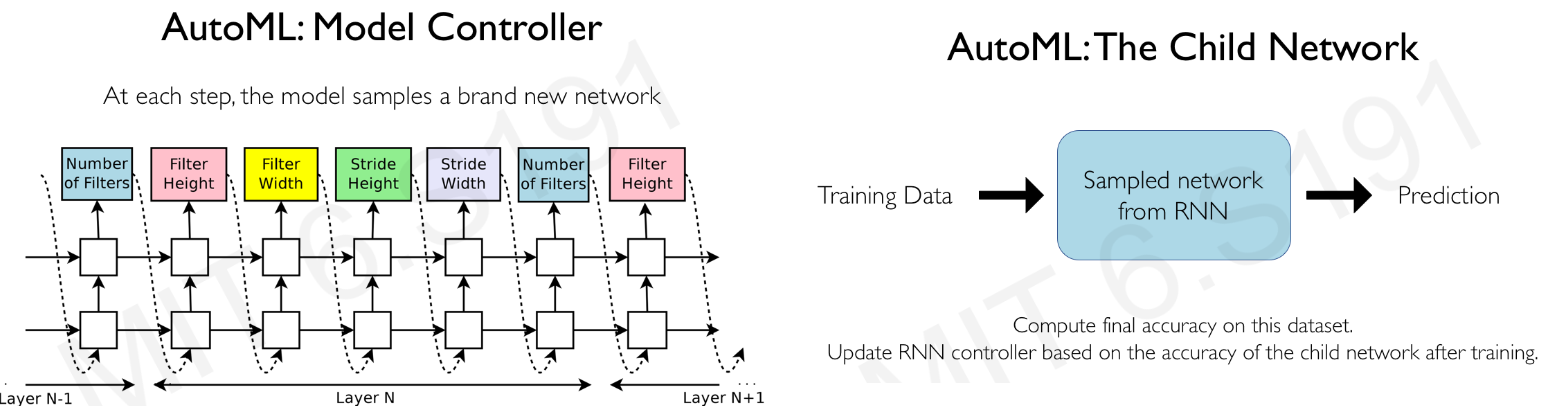

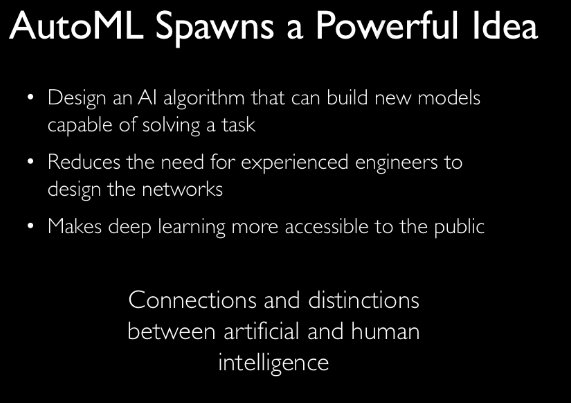